# Create Annotations - Example

The following notebook will guide through the process of using the annotation creator. This can be used for any grayscale - mask pair which from which COCO-style annotations need to be generated and that need to separated into training and validation sets.


In [ ]:
import eilnn
import os
import json
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
from mrcnn.model import log
from samples import particles


**image_directory =** Indicate folder where grayscale images and masks are located. The grayscale and masks **must** be contained in separate folders named _grayscale/_ and _masks/_. An example can be viewed in the *example_annotations/* folder in the repository.

Note: the script enables loading both binary and labelled masks, but so is suited only for single class scenarios

**val_split =** train/validation split (0.3 default)

**first_im =** first image of the stack to be taken into consideration - can be used to exclude current collectors or air slices if required. (1 default)

Both of these parameters are optional.

In [10]:
image_directory = 'C:/Users/Sohrab/Documents/crack/eil-nn/images/example_annotations/data_ann/'
val_split = 0.3
first_im = 1

Initialize the **ImportUtils** class with the **image_directory** defined previously, and run the **create_annotations** function.

In [11]:
annotations_class = eilnn.ImportUtils(image_directory)
annotations_class.create_annotations(val_split, first_im)

Loading grayscale images from:  C:\Users\Sohrab\Documents\crack\eil-nn\images\example_annotations\data_ann\grayscale/
Saving train and validation sets in:  C:\Users\Sohrab\Documents\crack\eil-nn\images\example_annotations\data
Images Loaded..
Saving grayscale_073.tif to /data/train folder..
Saving grayscale_099.tif to /data/train folder..
Saving grayscale_084.tif to /data/train folder..
Saving grayscale_081.tif to /data/train folder..
Saving grayscale_097.tif to /data/train folder..
Saving grayscale_095.tif to /data/train folder..
Saving grayscale_098.tif to /data/train folder..
Saving grayscale_082.tif to /data/train folder..
Saving grayscale_088.tif to /data/train folder..
Saving grayscale_093.tif to /data/train folder..
Saving grayscale_076.tif to /data/train folder..
Saving grayscale_087.tif to /data/train folder..
Saving grayscale_079.tif to /data/train folder..
Saving grayscale_085.tif to /data/train folder..
Saving grayscale_094.tif to /data/train folder..
Saving grayscale_091.t

# Visualise Annotations
If you wish to visualise the annotatations, this can be done with the tools provided in Mask R-CNN as follows. For this iteration, Mask R-CNN **must** be previously installed but future updates could include the package. This example is running on Keras 1.1.2 and GPU enabled Tensorflow 2.2.0.

number of training sets: 430
Image Count:430
Class Count:2
{'source': '', 'id': 0, 'name': 'BG'}
{'source': 'particles', 'id': 1, 'name': 'particles'}


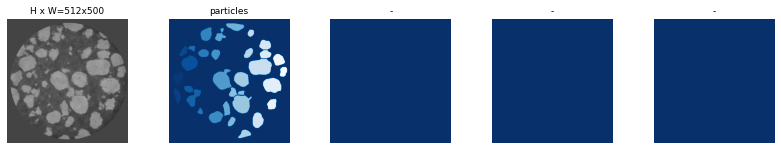

In [13]:
train_val = 'train'
dataset_dir = os.path.join('C:/Users/Sohrab/Documents/crack/eil-nn/images/example_annotations/data', train_val)
annotations = json.load(open(os.path.join(dataset_dir,'annotations.json')))
annotations = list(annotations.values())
annotations = [a for a in annotations[0] if a['regions']]
print('number of training sets:',len(annotations))
dataset = particles.ParticlesDataset()
dataset.load_particles(os.path.join('C:/Users/Sohrab/Documents/crack/eil-nn/images/example_annotations/data/'),'annotations.json','train')
dataset.prepare()
print('Image Count:{}'.format(len(dataset.image_ids)))
print('Class Count:{}'.format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print(info)

image_ids =5
image = dataset.load_image(image_ids)
mask, class_ids = dataset.load_mask(image_ids)
visualize.display_top_masks(image, mask, class_ids,dataset.class_names)

image_id 5 C:/Users/Sohrab/Documents/crack/eil-nn/images/example_annotations/data/train\grayscale_099.tif
image                    shape: (512, 500, 3)         min:   37.00000  max:  173.00000  uint8
mask                     shape: (512, 500, 31)        min:    0.00000  max:    1.00000  bool
class_ids                shape: (31,)                 min:    1.00000  max:    1.00000  int32
bbox                     shape: (31, 4)               min:   17.00000  max:  492.00000  int32


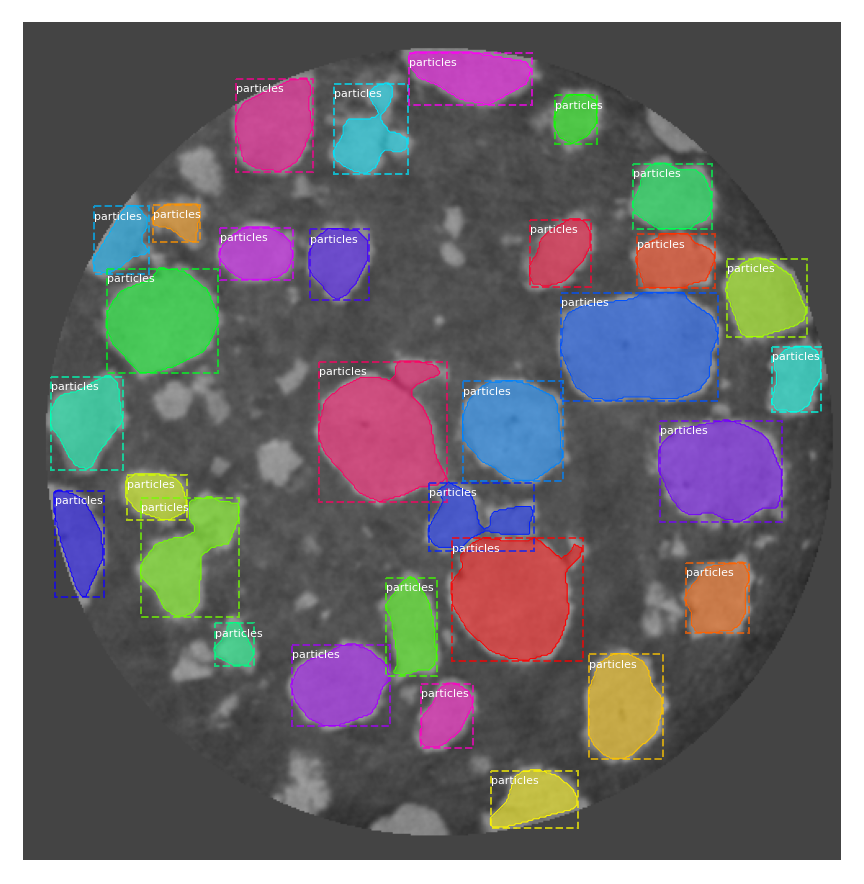

In [14]:
#compute bounding box
bbox = utils.extract_bboxes(mask)

#display image and additional stats
print('image_id',image_ids,dataset.image_reference(image_ids))
log('image',image)
log('mask',mask)
log('class_ids',class_ids)
log('bbox',bbox)

#display image and instances
visualize.display_instances(image,bbox,mask,class_ids,dataset.class_names)